In [1]:
import sys
import emission.public.pull_and_load_public_data as plpd
import pandas as pd
import emission.storage.timeseries.aggregate_timeseries as estag
public_ids = estag.TEST_PHONE_IDS
import arrow
from uuid import UUID
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

import emission.core.get_database as edb
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt
import emission.storage.timeseries.abstract_timeseries as esta
import emission.storage.timeseries.timequery as estt
import numpy as np
import emission.analysis.point_features as pf
import attrdict as ad
import scipy.interpolate as spi
import emission.core.wrapper.entry as ecwe
import emission.core.wrapper.location as ecwl
pd.options.display.float_format = '{:,.10f}'.format

# Retreiving Data Between Specific Timestamps 

Get starting timestamp

In [2]:
from_ts = arrow.get('2017-01-26T17:56:20.000-08:00').timestamp
from_ts
arrow.get(from_ts).to("America/Los_Angeles")

<Arrow [2017-01-26T17:56:20-08:00]>

Get end timestamp

In [3]:
end_ts = arrow.get("2017-01-26T18:15:00.000-08.00").timestamp
end_ts = end_ts - 290
arrow.get(end_ts)

<Arrow [2017-01-27T02:10:10+00:00]>

Loading data, between timestamps, from server.

In [4]:
plpd.request_batched_data("https://e-mission.eecs.berkeley.edu",
                          from_ts ,end_ts, map(str, public_ids))

Data loaded to local server!


# Organizing data for each phone into dataframes

Function to get range of points for a specific phone time series

In [5]:
def get_points_from_ts_for_range(ts, start_ts, end_ts):
    return ts.get_data_df("background/location", 
                          estt.TimeQuery('metadata.write_ts', 
                                         start_ts, end_ts))

In [6]:
iphone_id_3 = [UUID("c528bcd2-a88b-3e82-be62-ef4f2396967a")]
iphone_id_4 = [UUID("95e70727-a04e-3e33-b7fe-34ab19194f8b")]
android_id_3 = [UUID("86842c35-da28-32ed-a90e-2da6663c5c73")]
android_id_4 = [UUID("3bc0f91f-7660-34a2-b005-5c399598a369")]

The 4 different phones and their IDs

In [7]:
iphone_ts_3 = map(lambda u: esta.TimeSeries.get_time_series(u),
                  iphone_id_3)
iphone_ts_4 = map(lambda u: esta.TimeSeries.get_time_series(u),
                  iphone_id_4)
android_ts_3 = map(lambda u: esta.TimeSeries.get_time_series(u),
                   android_id_3)
android_ts_4 = map(lambda u: esta.TimeSeries.get_time_series(u),
                   android_id_4)

Creating the dataframes, consisting of timeseries generated above. 

In [8]:
iphone_df_3 = get_points_from_ts_for_range(iphone_ts_3[0],from_ts,
                                           end_ts)
iphone_df_4 = get_points_from_ts_for_range(iphone_ts_4[0],from_ts,
                                           end_ts)
android_df_3 = get_points_from_ts_for_range(android_ts_3[0],from_ts,
                                            end_ts)  
android_df_4 = get_points_from_ts_for_range(android_ts_4[0],from_ts,
                                            end_ts)

Revised dataframes consisting only of latitudes, longitudes and timestamps.

In [9]:
new_iphone_df_3 = iphone_df_3[['latitude','longitude','ts']].copy()
new_iphone_df_4 = iphone_df_4[['latitude','longitude','ts']].copy()
new_android_df_3 = android_df_3[['latitude','longitude','ts']].copy()
new_android_df_4 = android_df_4[['latitude','longitude','ts']].copy()

# Importing Ground Truth points from .CSV file

In [10]:
ground_truth = pd.read_csv("/Users/jlamba/Desktop/e-mission berkeley trip ground truth - Sheet1 .csv")

Plotting points to see shape/ ensure it will look similar to shapes we generate for raw data.

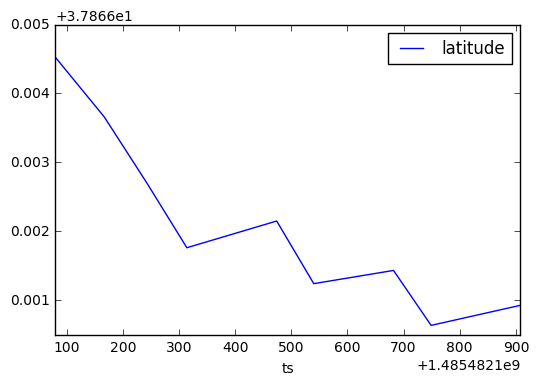

In [11]:
gt_time = ground_truth['fmt_time']
gt_time2 = []
for elem in gt_time:
    gt_time2.append(arrow.get('2017-01-26T'+ elem +'.000-08:00').timestamp)
ground_truth['ts'] = gt_time2
ground_truth
ground_truth.plot(x = 'ts',y = 'latitude')

# Plotting Raw Latitudes and Longitudes of 4 phones against ground truth

Plot comparing raw latitudes of all 4 phones and ground truth

[<matplotlib.lines.Line2D object at 0x1043a81d0>, <matplotlib.lines.Line2D object at 0x1043c63d0>, <matplotlib.lines.Line2D object at 0x1043b75d0>, <matplotlib.lines.Line2D object at 0x1043caad0>, <matplotlib.lines.Line2D object at 0x114058b90>] [u'latitude', u'latitude', u'latitude', u'latitude', u'latitude']


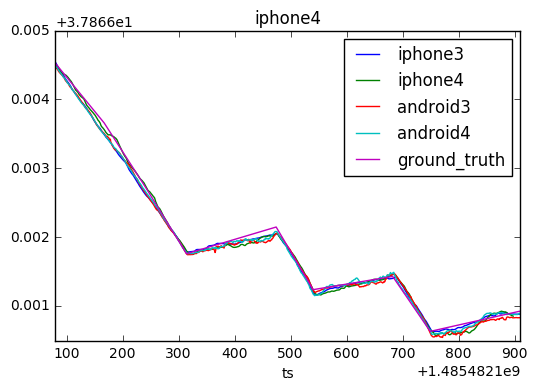

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1)

new_iphone_df_3.index = new_iphone_df_3['ts']
new_iphone_df_4.index = new_iphone_df_4['ts']
new_android_df_3.index = new_android_df_3['ts']
new_android_df_4.index = new_android_df_4['ts']

df1 = pd.DataFrame(new_iphone_df_3, index=new_iphone_df_3.index,columns=['latitude'])
df2 = pd.DataFrame(new_iphone_df_4, index=new_iphone_df_4.index,columns=['latitude'])
df3 = pd.DataFrame(new_android_df_3, index=new_android_df_3.index,columns=['latitude'])
df4 = pd.DataFrame(new_android_df_4, index=new_android_df_4.index,columns=['latitude'])

df1.plot(ax=axes, title = 'iphone3')
df2.plot(ax=axes,title = 'iphone4' )
df3.plot(ax=axes, label = 'android3')
df4.plot(ax = axes, label = 'android4')
ground_truth.plot(x = 'ts', y = 'latitude', ax = axes)

lines, labels = axes.get_legend_handles_labels()
print lines, labels
axes.legend(lines, ["iphone3", "iphone4", "android3", "android4","ground_truth"], loc='best') 

Plot comparing raw longitudes of all 4 phones and ground truth.

[<matplotlib.lines.Line2D object at 0x11575a910>, <matplotlib.lines.Line2D object at 0x115769d10>, <matplotlib.lines.Line2D object at 0x115774790>, <matplotlib.lines.Line2D object at 0x11577ba10>, <matplotlib.lines.Line2D object at 0x11c6636d0>] [u'longitude', u'longitude', u'longitude', u'longitude', u'longitude']


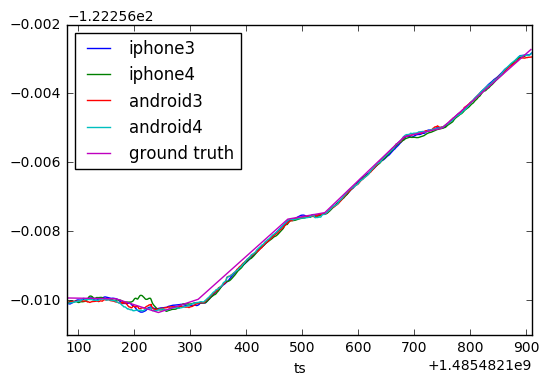

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=1)

df2_2 = pd.DataFrame(new_iphone_df_4, index=new_iphone_df_4.index,columns=['longitude'])
df3_3 = pd.DataFrame(new_android_df_3, index=new_android_df_3.index,columns=['longitude'])
df4_4 = pd.DataFrame(new_android_df_4, index=new_android_df_4.index,columns=['longitude'])
df1_1 = pd.DataFrame(new_iphone_df_3, index=new_iphone_df_3.index,columns=['longitude'])

df1_1.plot(ax=axes)
df2_2.plot(ax=axes)
df3_3.plot(ax=axes)
df4_4.plot(ax = axes)
ground_truth.plot(x = 'ts', y = 'longitude', ax = axes)
lines, labels = axes.get_legend_handles_labels()
print lines, labels
axes.legend(lines, ["iphone3", "iphone4", "android3", "android4", 'ground truth'], loc='best')

# Interpolation

In [76]:
import scipy.interpolate as spi
import numpy as np
%matplotlib inline

The following function takes in the 4 different phone timeseries and the ground_truth dataframe and the start and end timestampts and essentially creates interpolation functions for the latitude and longitude of each. These functions are then applied to a periodic range of timestamps and put together in a dataframe. The dataframe also contains the differences in distances between the different phones ( 4 differences to be exact), the mean values of the latitudes and longitudes, and the difference in distances between the mean values and the ground truth values. 

In [77]:
def get_interp_distance_df(android3_ts, android4_ts, ios3_ts, ios4_ts, ground_truth_df, start_ts, end_ts):
    android3_df = android3_ts.get_data_df("background/location", estt.TimeQuery('metadata.write_ts', start_ts, end_ts))
    android4_df = android4_ts.get_data_df("background/location", estt.TimeQuery('metadata.write_ts', start_ts, end_ts))
    ios3_df = ios3_ts.get_data_df("background/location", estt.TimeQuery('metadata.write_ts', start_ts, end_ts))
    ios4_df = ios4_ts.get_data_df("background/location", estt.TimeQuery('metadata.write_ts', start_ts, end_ts))
    android3_latf = spi.interp1d(x=android3_df.ts, y=android3_df.latitude, bounds_error=False,
                                fill_value="extrapolate")
    android3_lngf = spi.interp1d(x=android3_df.ts, y=android3_df.longitude, bounds_error=False, 
                                fill_value="extrapolate")
    android4_latf = spi.interp1d(x=android4_df.ts, y=android4_df.latitude, bounds_error=False, 
                                fill_value="extrapolate")
    android4_lngf = spi.interp1d(x=android4_df.ts, y=android4_df.longitude, bounds_error=False, 
                                fill_value="extrapolate")
    ios3_latf = spi.interp1d(x=ios3_df.ts, y=ios3_df.latitude, bounds_error=False, 
                            fill_value=(ios3_df.latitude.iloc[0], ios3_df.latitude.iloc[-1]))
    ios3_lngf = spi.interp1d(x=ios3_df.ts, y=ios3_df.longitude, bounds_error=False, 
                            fill_value=(ios3_df.longitude.iloc[0], ios3_df.longitude.iloc[-1]))
    ios4_latf = spi.interp1d(x=ios4_df.ts, y=ios4_df.latitude, bounds_error=False, 
                            fill_value=(ios4_df.latitude.iloc[0], ios4_df.latitude.iloc[-1]))
    ios4_lngf = spi.interp1d(x=ios4_df.ts, y=ios4_df.longitude, bounds_error=False, 
                            fill_value=(ios4_df.longitude.iloc[0], ios4_df.longitude.iloc[-1]))
    ground_truth_latf = spi.interp1d(x = ground_truth_df.ts, y = ground_truth.latitude, bounds_error=False, 
                                     fill_value=(ground_truth.latitude.iloc[0], ground_truth.latitude.iloc[-1]))
    ground_truth_lngf = spi.interp1d(x = ground_truth_df.ts, y = ground_truth.longitude, bounds_error=False, 
                                     fill_value=(ground_truth.longitude.iloc[0], ground_truth.longitude.iloc[-1]))
    ts_new = np.arange(int(start_ts), int(end_ts - 290), 1)
    fmt_time_new = map(lambda ts: pydt.datetime.fromtimestamp(ts).isoformat(), ts_new)
    interp_df = pd.DataFrame({"ts": ts_new, "fmt_time": fmt_time_new,
                            "android3_lat": android3_latf(ts_new), "android3_lng": android3_lngf(ts_new),
                              "android4_lat": android4_latf(ts_new), "android4_lng": android4_lngf(ts_new),
                              "ios3_lat": ios3_latf(ts_new),"ios3_lng": ios3_lngf(ts_new),
                            "ios4_lat": ios4_latf(ts_new), "ios4_lng": ios4_lngf(ts_new), 
                              "ground_truth_lat":ground_truth_latf(ts_new),"ground_truth_lng":ground_truth_lngf(ts_new) },
                             index=ts_new)
    baseline_distances_1 = np.abs(interp_df.apply(calDistance1, axis=1))
    baseline_distances_2 = np.abs(interp_df.apply(calDistance2, axis=1))
    baseline_distances_3 = np.abs(interp_df.apply(calDistance3, axis=1))
    baseline_distances_4 = np.abs(interp_df.apply(calDistance4, axis=1))

    interp_df["mean_lat"] = interp_df.apply(meanLat, axis=1)
    interp_df["mean_lng"] = interp_df.apply(meanLng, axis=1)
    
    interp_df["mean_lat1"] = interp_df.apply(meanLat1, axis=1)
    interp_df["mean_lat2"] = interp_df.apply(meanLat2, axis=1)
    interp_df["mean_lat3"] = interp_df.apply(meanLat3, axis=1)
    interp_df["mean_lat4"] = interp_df.apply(meanLat4, axis=1)
    
    interp_df["mean_lng1"] = interp_df.apply(meanLng1, axis=1)
    interp_df["mean_lng2"] = interp_df.apply(meanLng2, axis=1)
    interp_df["mean_lng3"] = interp_df.apply(meanLng3, axis=1)
    interp_df["mean_lng4"] = interp_df.apply(meanLng4, axis=1)
    
    interp_df["baseline_distances1"] = baseline_distances_1
    interp_df["baseline_distances2"] = baseline_distances_2
    interp_df["baseline_distances3"] = baseline_distances_3
    interp_df["baseline_distances4"] = baseline_distances_4
    
    interp_df["ground_distances1"] = np.abs(interp_df.apply(groundDistance1, axis=1))
    interp_df["ground_distances2"] = np.abs(interp_df.apply(groundDistance2, axis=1))
    interp_df["ground_distances3"] = np.abs(interp_df.apply(groundDistance3, axis=1))
    interp_df["ground_distances4"] = np.abs(interp_df.apply(groundDistance4, axis=1))
    
    interp_df["ground_distances"] = np.abs(interp_df.apply(groundDistance, axis=1))
    return interp_df

In [78]:
def calDistance1(row):
#    print("Calculating distance between %s,%s,%s,%s" % 
#          (row["android3_lat"], row["android3_lng"], row["android4_lat"], row["android4_lng"]))
    return pf.calDistance(ad.AttrDict({"latitude": row["android3_lat"], "longitude": row["android3_lng"]}),
                          ad.AttrDict({"latitude": row["android4_lat"], "longitude": row["android4_lng"]}))

In [79]:
def calDistance2(row):
    return pf.calDistance(ad.AttrDict({"latitude": row["ios3_lat"], "longitude": row["ios3_lng"]}),
                          ad.AttrDict({"latitude": row["ios4_lat"], "longitude": row["ios4_lng"]}))

In [80]:
def calDistance3(row):
    return pf.calDistance(ad.AttrDict({"latitude": row["ios3_lat"], "longitude": row["ios3_lng"]}),
                          ad.AttrDict({"latitude": row["android3_lat"], "longitude": row["android3_lng"]}))

In [81]:
def calDistance4(row):
    return pf.calDistance(ad.AttrDict({"latitude": row["ios4_lat"], "longitude": row["ios4_lng"]}),
                          ad.AttrDict({"latitude": row["android4_lat"], "longitude": row["android4_lng"]}))

In [82]:
def groundDistance(row):
    print "calculating distances for row %s " % row
    return pf.calDistance(ad.AttrDict({"latitude": row["ground_truth_lat"], "longitude": row["ground_truth_lng"]}),
                          ad.AttrDict({"latitude": row["mean_lat"], "longitude": row["mean_lng"]}))

In [83]:
def groundDistance1(row):
    print "calculating distances for row %s " % row
    return pf.calDistance(ad.AttrDict({"latitude": row["ground_truth_lat"], "longitude": row["ground_truth_lng"]}),
                          ad.AttrDict({"latitude": row["mean_lat1"], "longitude": row["mean_lng1"]}))

In [84]:
def groundDistance2(row):
    print "calculating distances for row %s " % row
    return pf.calDistance(ad.AttrDict({"latitude": row["ground_truth_lat"], "longitude": row["ground_truth_lng"]}),
                          ad.AttrDict({"latitude": row["mean_lat2"], "longitude": row["mean_lng2"]}))

In [85]:
def groundDistance3(row):
    print "calculating distances for row %s " % row
    return pf.calDistance(ad.AttrDict({"latitude": row["ground_truth_lat"], "longitude": row["ground_truth_lng"]}),
                          ad.AttrDict({"latitude": row["mean_lat3"], "longitude": row["mean_lng3"]}))

In [86]:
def groundDistance4(row):
    print "calculating distances for row %s " % row
    return pf.calDistance(ad.AttrDict({"latitude": row["ground_truth_lat"], "longitude": row["ground_truth_lng"]}),
                          ad.AttrDict({"latitude": row["mean_lat4"], "longitude": row["mean_lng4"]}))

In [87]:
def meanLat1(row):
    return np.mean([row["android3_lat"], row["android4_lat"]])

In [88]:
def meanLat2(row):
    return np.mean([row["ios3_lat"], row["ios4_lat"]])    

In [89]:
def meanLat3(row):
    return np.mean([row["ios3_lat"],row["android3_lat"]])

In [90]:
def meanLat4(row):
    return np.mean([row["ios4_lat"],row["android4_lat"]])

In [91]:
def meanLat(row):
    return np.mean([row["android3_lat"], row["android4_lat"],
                    row["ios3_lat"], row["ios4_lat"]])

In [92]:
def meanLng1(row):
    return np.mean([row["android3_lng"], row["android4_lng"]])

In [93]:
def meanLng2(row):
    return np.mean([row["ios3_lng"], row["ios4_lng"]])

In [94]:
def meanLng3(row):
    return np.mean([row["ios3_lng"],row["android3_lng"]])

In [95]:
def meanLng4(row):
    return np.mean([row["ios4_lng"],row["android4_lng"]])

In [96]:
def meanLng(row):
    return np.mean([row["android3_lng"], row["android4_lng"],
                   row["ios3_lng"], row["ios4_lng"]])

# Plotting non-interpolated vs. interpolated points 

Ground Truth Raw Latitude points against interpolated Latitude points

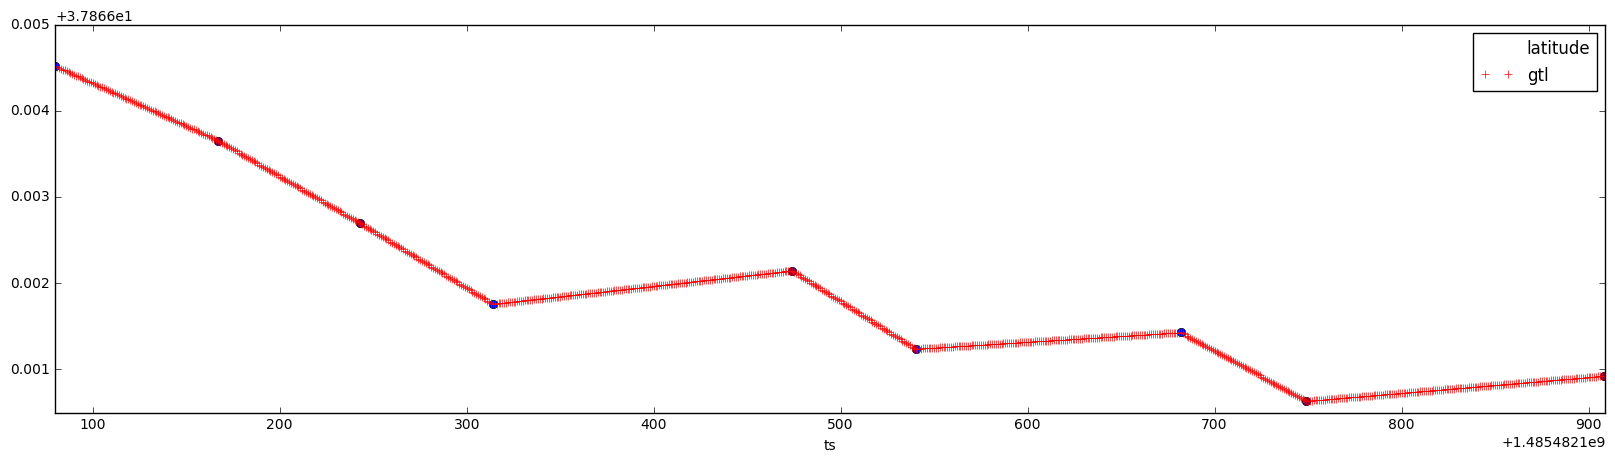

In [97]:
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True, figsize=(20,5))
ground_truth.plot(x = 'ts',y = 'latitude', ax=axes, style='bo')
ts_new = np.arange(int(from_ts), int(end_ts), 1)
ground_truth_latf = spi.interp1d(x = ground_truth.ts, y = ground_truth.latitude, bounds_error=False, 
                                     fill_value=(ground_truth.latitude.iloc[0], ground_truth.latitude.iloc[-1]))
pd.DataFrame({"ts": ts_new, "gtl": ground_truth_latf(ts_new)}).plot(x = 'ts', y = 'gtl', ax=axes, style='r+')

Same, but Longitude points

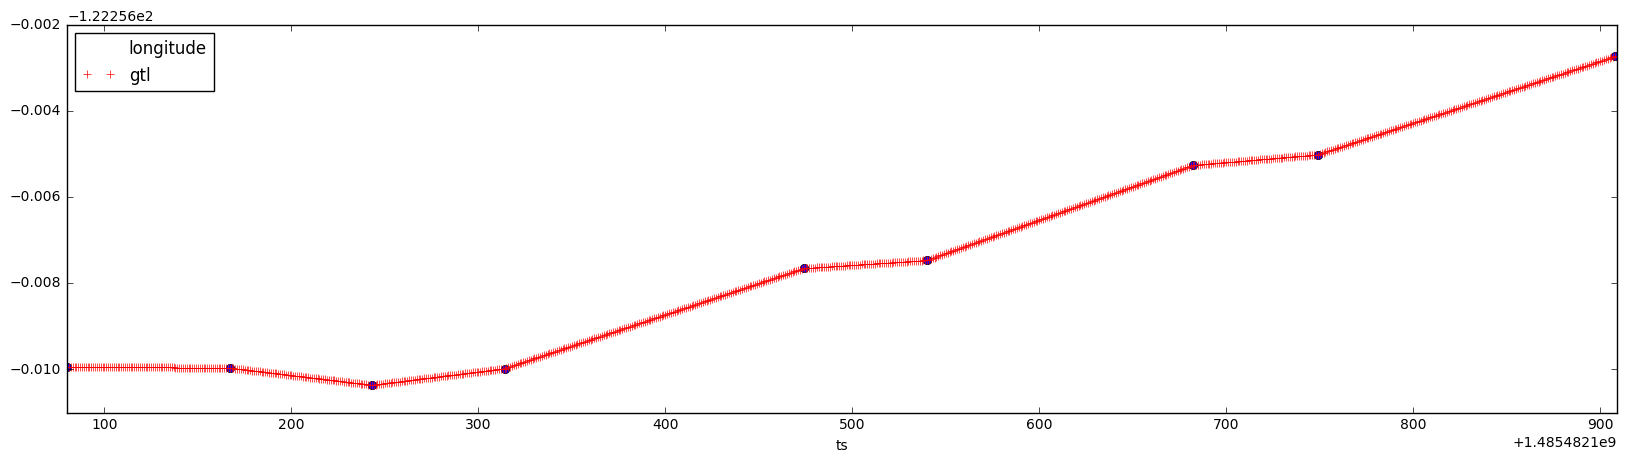

In [98]:
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True, figsize=(20,5))
ground_truth.plot(x = 'ts',y = 'longitude', ax=axes, style='bo')
ground_truth_lngf = spi.interp1d(x = ground_truth.ts, y = ground_truth.longitude, bounds_error=False, 
                                     fill_value=(ground_truth.longitude.iloc[0], ground_truth.longitude.iloc[-1]))
pd.DataFrame({"ts": ts_new, "gtl": ground_truth_lngf(ts_new)}).plot(x = 'ts', y = 'gtl', ax=axes, style='r+')

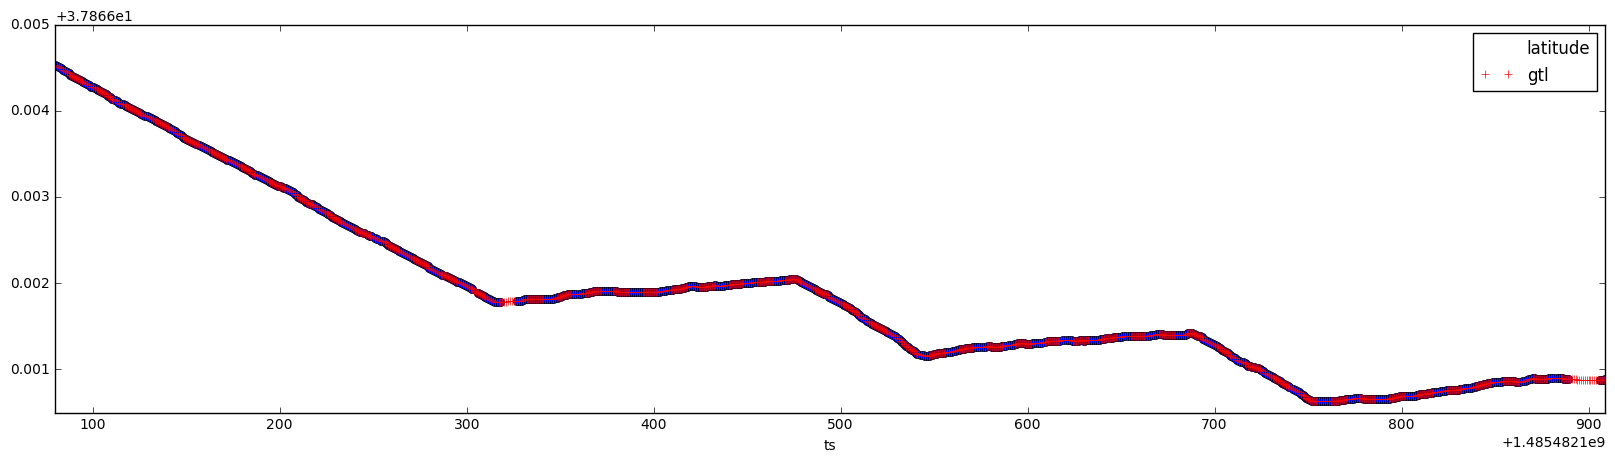

In [99]:
#ios3_Latitude
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True, figsize=(20,5))
new_iphone_df_3.plot(x = 'ts',y = 'latitude', ax=axes, style='bo')
ios3_latf = spi.interp1d(x = new_iphone_df_3.ts, y = new_iphone_df_3.latitude, bounds_error=False, 
                                     fill_value=(new_iphone_df_3.latitude.iloc[0], new_iphone_df_3.latitude.iloc[-1]))
pd.DataFrame({"ts": ts_new, "gtl": ios3_latf(ts_new)}).plot(x = 'ts', y = 'gtl', ax=axes, style='r+')

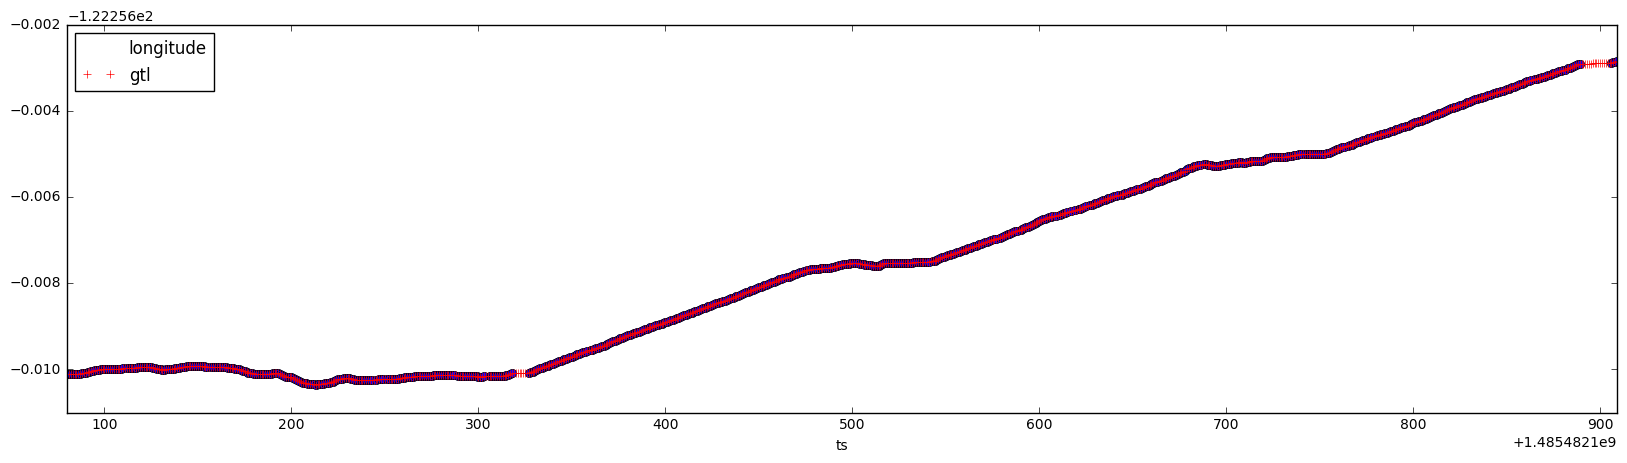

In [100]:
#ios3_Longitude
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True, figsize=(20,5))
new_iphone_df_3.plot(x = 'ts',y = 'longitude', ax=axes, style='bo')
ios3_lngf = spi.interp1d(x = new_iphone_df_3.ts, y = new_iphone_df_3.longitude, bounds_error=False, 
                                     fill_value=(new_iphone_df_3.longitude.iloc[0], new_iphone_df_3.longitude.iloc[-1]))
pd.DataFrame({"ts": ts_new, "gtl": ios3_lngf(ts_new)}).plot(x = 'ts', y = 'gtl', ax=axes, style='r+')

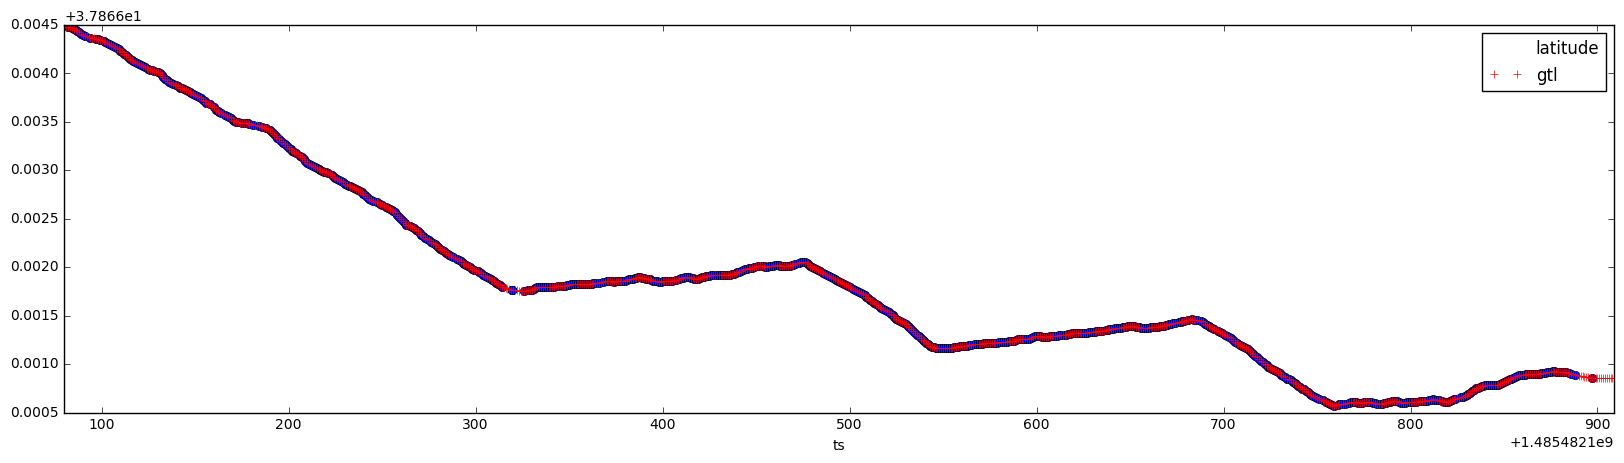

In [101]:
#ios4_Latitude
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True, figsize=(20,5))
new_iphone_df_4.plot(x = 'ts',y = 'latitude', ax=axes, style='bo')
ios4_latf = spi.interp1d(x = new_iphone_df_4.ts, y = new_iphone_df_4.latitude, bounds_error=False, 
                                     fill_value=(new_iphone_df_4.latitude.iloc[0], new_iphone_df_4.latitude.iloc[-1]))
pd.DataFrame({"ts": ts_new, "gtl": ios4_latf(ts_new)}).plot(x = 'ts', y = 'gtl', ax=axes, style='r+')

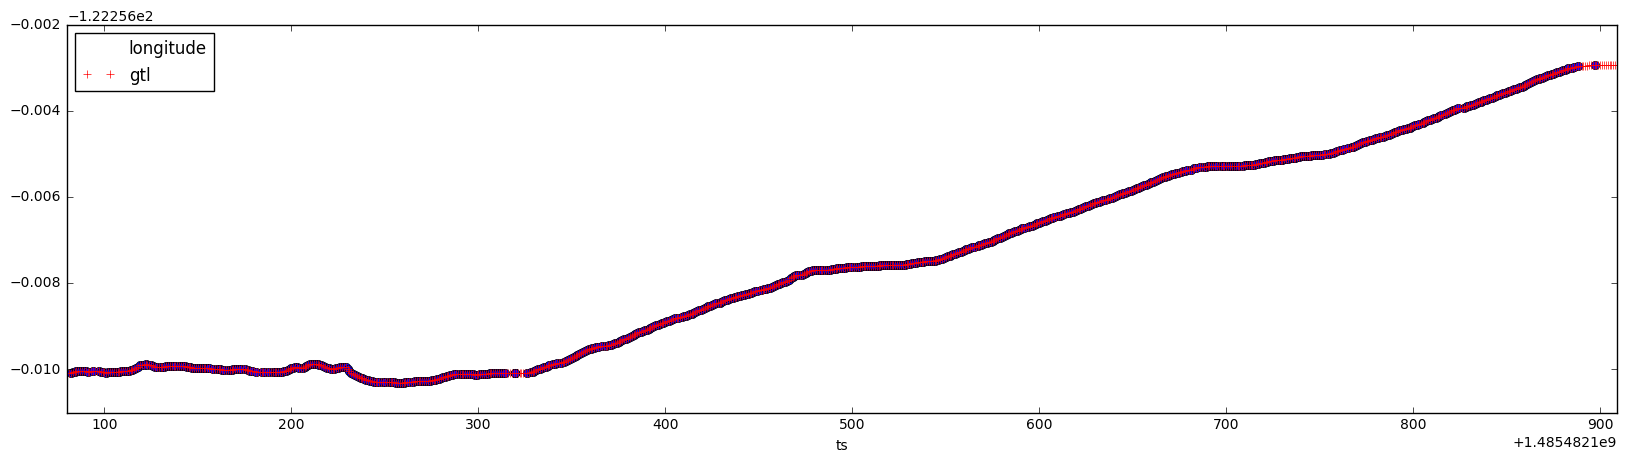

In [102]:
#ios4_longitude
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True, figsize=(20,5))
new_iphone_df_4.plot(x = 'ts',y = 'longitude', ax=axes, style='bo')
ios4_lngf = spi.interp1d(x = new_iphone_df_4.ts, y = new_iphone_df_4.longitude, bounds_error=False, 
                                     fill_value=(new_iphone_df_4.longitude.iloc[0], new_iphone_df_4.longitude.iloc[-1]))
pd.DataFrame({"ts": ts_new, "gtl": ios4_lngf(ts_new)}).plot(x = 'ts', y = 'gtl', ax=axes, style='r+')

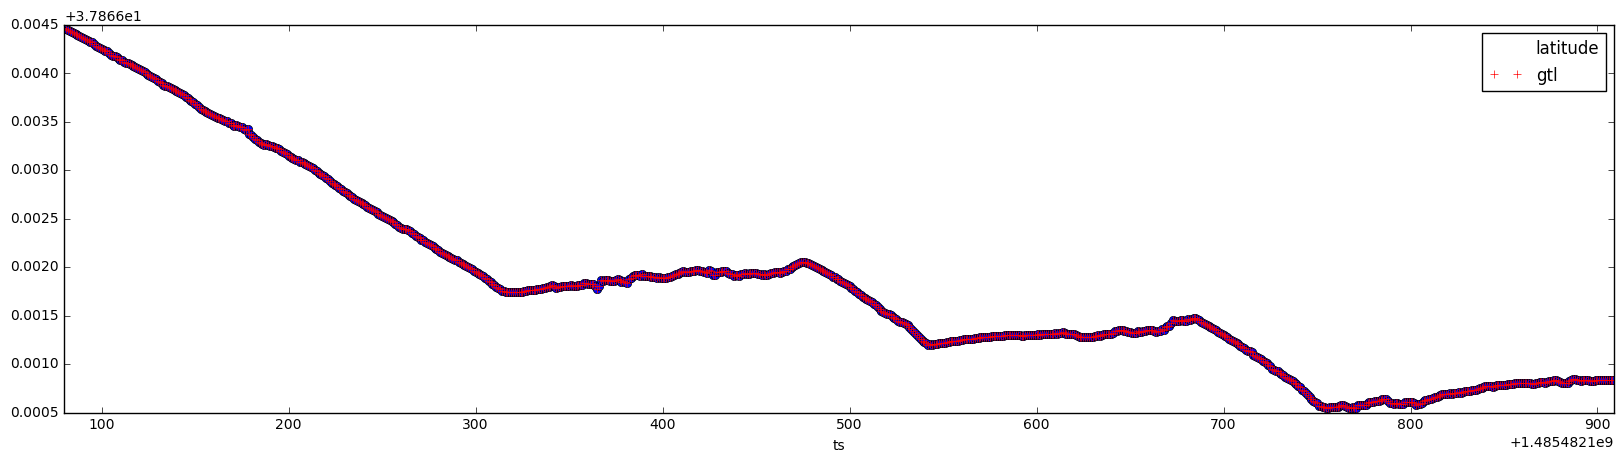

In [103]:
#android3_Latitude
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True, figsize=(20,5))
new_android_df_3.plot(x = 'ts',y = 'latitude', ax=axes, style='bo')
android3_latf = spi.interp1d(x = new_android_df_3.ts, y = new_android_df_3.latitude, bounds_error=False, 
                                     fill_value=(new_android_df_3.latitude.iloc[0], new_android_df_3.latitude.iloc[-1]))
pd.DataFrame({"ts": ts_new, "gtl": android3_latf(ts_new)}).plot(x = 'ts', y = 'gtl', ax=axes, style='r+')

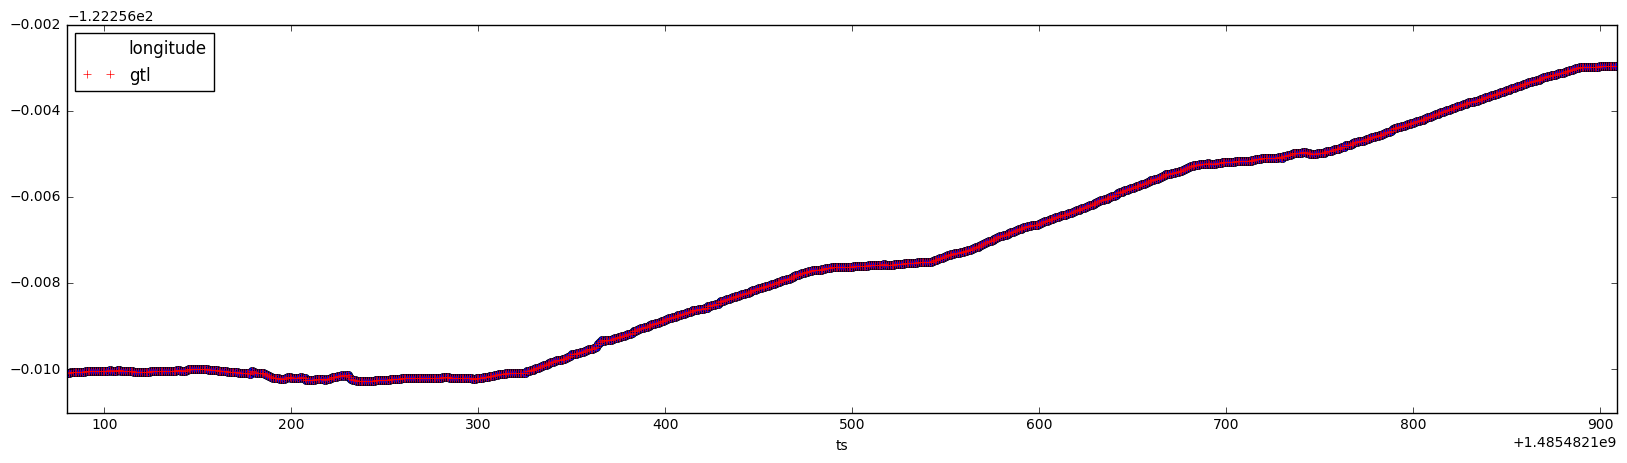

In [104]:
#android3_Longitude
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True, figsize=(20,5))
new_android_df_3.plot(x = 'ts',y = 'longitude', ax=axes, style='bo')
android3_lngf = spi.interp1d(x = new_android_df_3.ts, y = new_android_df_3.longitude, bounds_error=False, 
                                     fill_value=(new_android_df_3.longitude.iloc[0], new_android_df_3.longitude.iloc[-1]))
pd.DataFrame({"ts": ts_new, "gtl": android3_lngf(ts_new)}).plot(x = 'ts', y = 'gtl', ax=axes, style='r+')

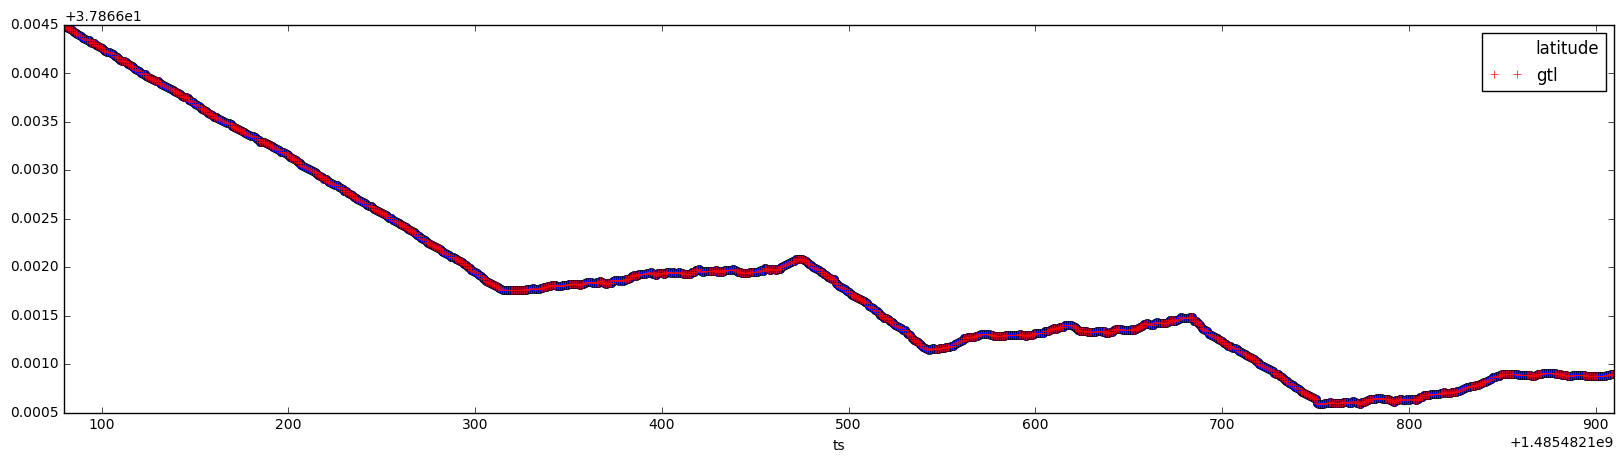

In [105]:
#android4_Latitude
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True, figsize=(20,5))
new_android_df_4.plot(x = 'ts',y = 'latitude', ax=axes, style='bo')
android4_latf = spi.interp1d(x = new_android_df_4.ts, y = new_android_df_4.latitude, bounds_error=False, 
                                     fill_value=(new_android_df_4.latitude.iloc[0], new_android_df_4.latitude.iloc[-1]))
pd.DataFrame({"ts": ts_new, "gtl": android4_latf(ts_new)}).plot(x = 'ts', y = 'gtl', ax=axes, style='r+')

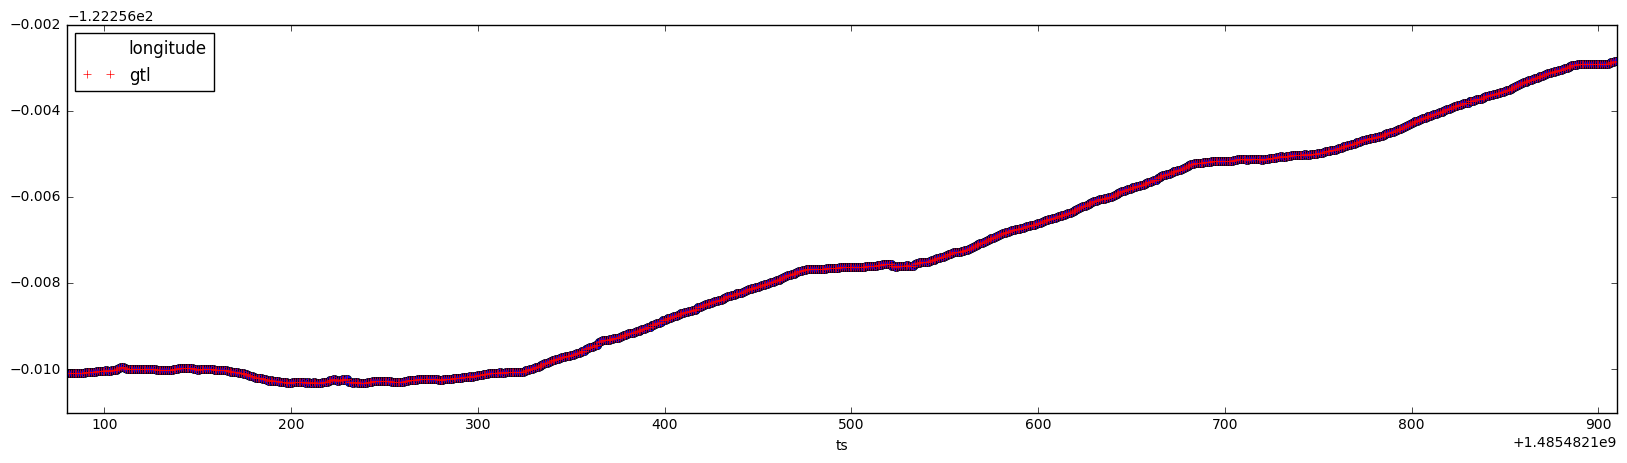

In [106]:
#android4_Longitude
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True, figsize=(20,5))
new_android_df_4.plot(x = 'ts',y = 'longitude', ax=axes, style='bo')
android4_lngf = spi.interp1d(x = new_android_df_4.ts, y = new_android_df_4.longitude, bounds_error=False, 
                                     fill_value=(new_android_df_4.longitude.iloc[0], new_android_df_4.longitude.iloc[-1]))
pd.DataFrame({"ts": ts_new, "gtl": android4_lngf(ts_new)}).plot(x = 'ts', y = 'gtl', ax=axes, style='r+')

# Analysing Inteprolated Values

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
distances = get_interp_distance_df(android_ts_3[0],android_ts_4[0],
                                   iphone_ts_3[0], iphone_ts_4[0], ground_truth, from_ts, end_ts)

calculating distances for row android3_lat                 37.8704684000
android3_lng               -122.2660816000
android4_lat                 37.8704945000
android4_lng               -122.2660872000
fmt_time               2017-01-26T17:56:20
ground_truth_lat             37.8705228000
ground_truth_lng           -122.2659393000
ios3_lat                     37.8705392825
ios3_lng                   -122.2661068385
ios4_lat                     37.8704843391
ios4_lng                   -122.2660719698
ts                              1485482180
mean_lat                     37.8704966304
mean_lng                   -122.2660869021
mean_lat1                    37.8704814500
mean_lat2                    37.8705118108
mean_lat3                    37.8705038412
mean_lat4                    37.8704894196
mean_lng1                  -122.2660844000
mean_lng2                  -122.2660894041
mean_lng3                  -122.2660942192
mean_lng4                  -122.2660795849
baseline_distances1     

Plotting different distance - differences alongside each other

In [ ]:
distances.plot(x = "ts", y = "baseline_distances2", ax = axes)
distances.plot(x = "ts", y = "baseline_distances3", ax = axes)
distances.plot(x = "ts", y = "baseline_distances4", ax = axes)

distances.plot(x="ts", y="ground_distances2", ax = axes)
distances.plot(x="ts", y="ground_distances3", ax = axes)
distances.plot(x="ts", y="ground_distances4", ax = axes)

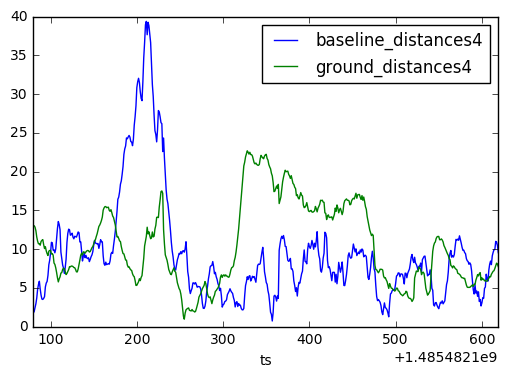

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=1)
distances.plot(x = "ts", y = "baseline_distances4", ax = axes)
distances.plot(x="ts", y="ground_distances4", ax = axes)

In [109]:
import scipy.stats as spis

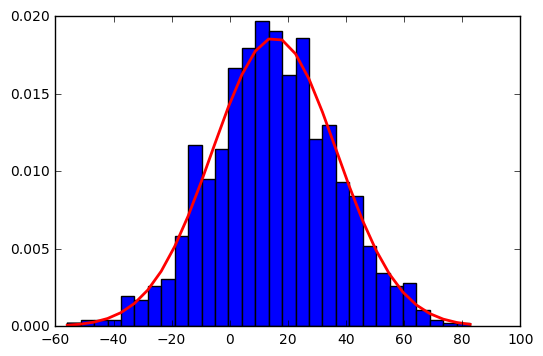

In [110]:
#Example: Baseline Distances 3
mu, sigma = 15.36, 21.42 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

Android3 vs. Android4

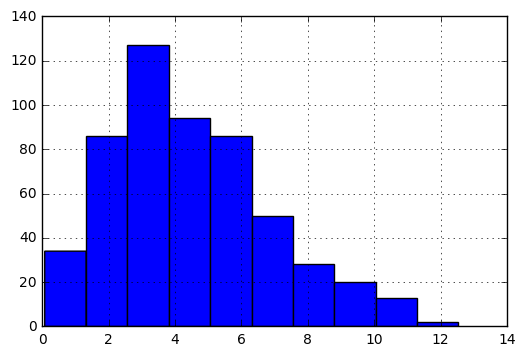

In [111]:
distances.baseline_distances1.hist()

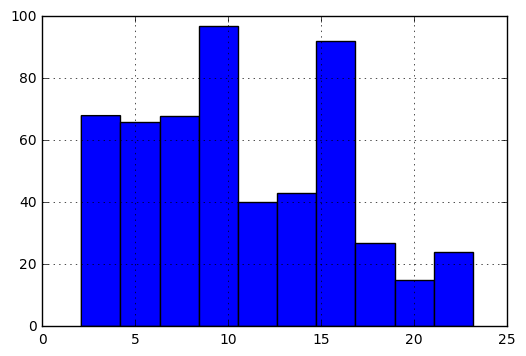

In [112]:
distances.ground_distances.hist()

In [113]:
def distance(p, ground):
    return abs(p - ground)

In [124]:
Quantity = []
d = {}
distances1 = distances[["fmt_time","ts", "baseline_distances1", 
                       "ground_distances1"]].copy()
Threshold = sorted([13,12,11,10, 9, 8, 7, 6, 5, 4, 3])
Threshold_range = [4,5,6,7,8,9,10,11,12,13]
for T in Threshold:
    d["f_dist{0}".format(T)] = distances1[(distances1.baseline_distances1 < T)]


In [125]:
Quan = []
ground_distance_mean = []
ground_distance_sum = []
Threshold = sorted([13,12,11,10, 9, 8, 7, 6, 5, 4, 3])
for T in Threshold:
    Quan.append(d["f_dist{0}".format(T)].baseline_distances1.describe()["count"])
    ground_distance_sum.append(d["f_dist{0}".format(T)]["ground_distances1"].sum())
    ground_distance_mean.append(d["f_dist{0}".format(T)]["ground_distances1"].mean())
final_df = pd.DataFrame({"Threshold":Threshold, "Quantity":Quan,"Ground_distances_sum":ground_distance_sum, "Ground_distance_mean":ground_distance_mean})
final_df

Ground_distance_mean  Ground_distances_sum       Quantity  Threshold
0          12.5306398302      2,092.6168516510 167.0000000000          3
1          11.7123641675      3,092.0641402317 264.0000000000          4
2          11.5650036455      3,908.9712321722 338.0000000000          5
3          11.3810180701      4,575.1692641780 402.0000000000          6
4          11.1189277626      5,136.9446263367 462.0000000000          7
5          11.0693326737      5,423.9730101251 490.0000000000          8
6          11.1047886013      5,652.3373980509 509.0000000000          9
7          11.1629450771      5,860.5461654725 525.0000000000         10
8          11.1799811878      6,003.6498978331 537.0000000000         11
9          11.1865287525      6,029.5389976116 539.0000000000         12
10         11.1919639912      6,043.6605552397 540.0000000000         13

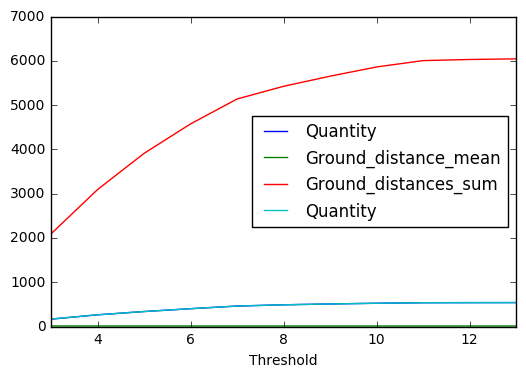

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Threshold", y="Quantity", ax=ax)
final_df.plot(x="Threshold", secondary_y="Error", ax=ax)

KeyError: 'Error'

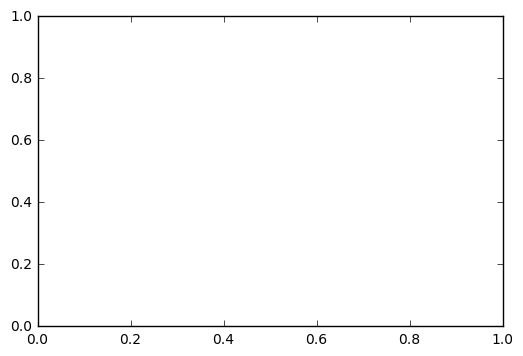

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Error", y="Quantity", ax=ax)

ios3 vs. ios4

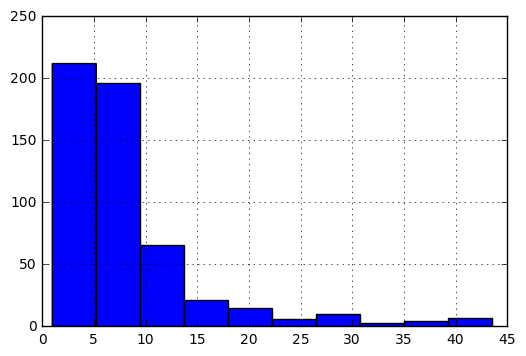

In [126]:
distances.baseline_distances2.hist()

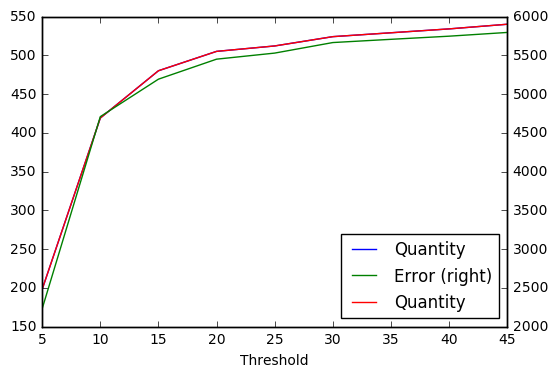

In [127]:
d = {}
distances2 = distances[["fmt_time","ts", "mean_lat", "mean_lng", "baseline_distances2", 
                       "ground_distances"]].copy()
Threshold = sorted([45, 40 ,35, 30,25, 20, 15, 10, 5])
for T in Threshold:
    d["f_dist{0}".format(T)] = distances2[distances2.baseline_distances2 < T]

Quan = []
error = []
for T in Threshold:
    Quan.append(d["f_dist{0}".format(T)].baseline_distances2.describe()["count"])
    error.append(d["f_dist{0}".format(T)]["ground_distances"].sum())
final_df = pd.DataFrame({"Threshold":Threshold, "Quantity":Quan, "Error":error})
final_df

fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Threshold", y="Quantity", ax=ax)
final_df.plot(x="Threshold", secondary_y="Error", ax=ax)

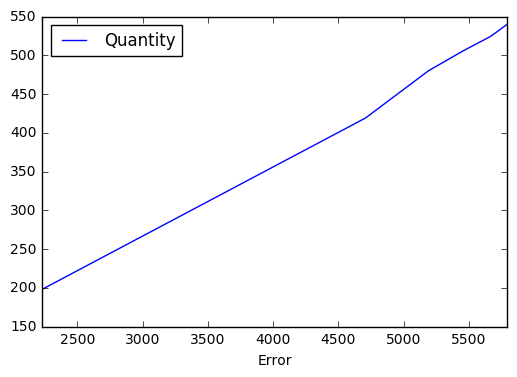

In [128]:
fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Error", y="Quantity", ax=ax)

ios3 vs. android3

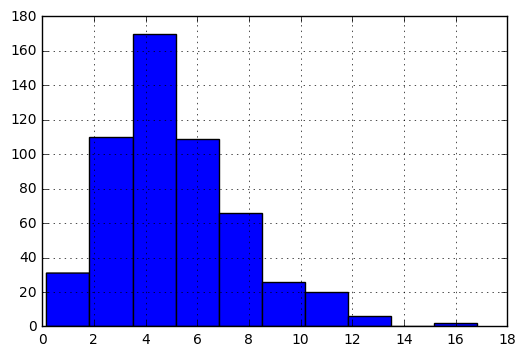

In [129]:
distances.baseline_distances3.hist()

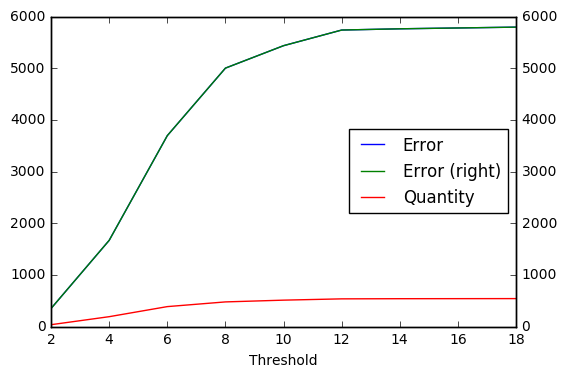

In [130]:
d = {}
distances3 = distances[["fmt_time","ts", "mean_lat", "mean_lng", "baseline_distances3", 
                       "ground_distances"]].copy()
Threshold = sorted([18, 16, 14, 12, 10, 8, 6, 4, 2])
for T in Threshold:
    d["f_dist{0}".format(T)] = distances3[distances3.baseline_distances3 < T]
Quan = []
error = []
for T in Threshold:
    Quan.append(d["f_dist{0}".format(T)].baseline_distances3.describe()["count"])
    error.append(d["f_dist{0}".format(T)]["ground_distances"].sum())
final_df = pd.DataFrame({"Threshold":Threshold, "Quantity":Quan, "Error":error})

fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Threshold", y="Error", ax=ax)
final_df.plot(x="Threshold", secondary_y="Error", ax=ax)

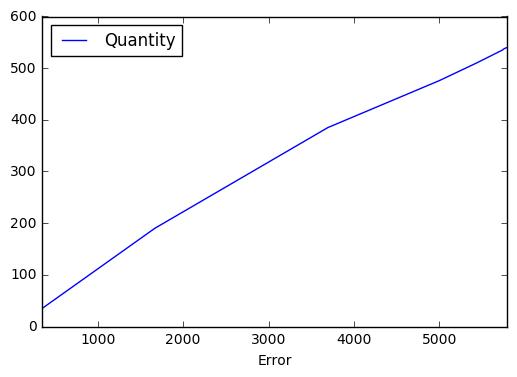

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Error", y="Quantity", ax=ax)

ios4 vs android4

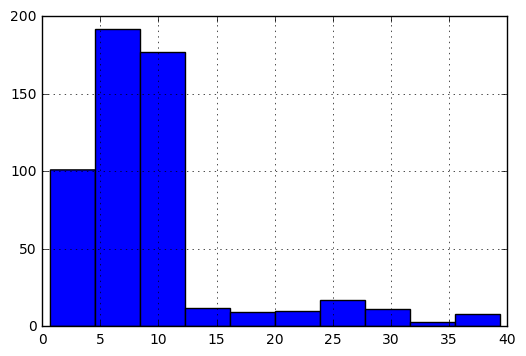

In [132]:
distances.baseline_distances4.hist()

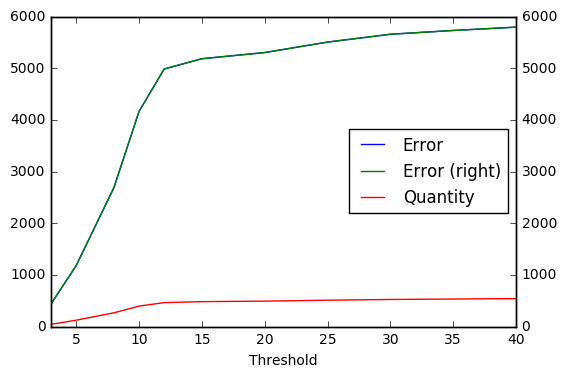

In [133]:
d = {}
distances4 = distances[["fmt_time","ts", "mean_lat", "mean_lng", "baseline_distances4", 
                       "ground_distances"]].copy()
Threshold = sorted([40,35,30,25,20,15,12,10,8,5,3 ])
for T in Threshold:
    d["f_dist{0}".format(T)] = distances4[distances4.baseline_distances4 < T]
Quan = []
error = []
for T in Threshold:
    Th.append(T)
    Quan.append(d["f_dist{0}".format(T)].baseline_distances4.describe()["count"])
    error.append(d["f_dist{0}".format(T)]["ground_distances"].sum())
final_df = pd.DataFrame({"Threshold":Threshold, "Quantity":Quan, "Error":error})


#distances4.baseline_distances4.quantile([0.85, 0.90, 0.95, 0.99])
fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Threshold", y="Error", ax=ax)
final_df.plot(x="Threshold", secondary_y="Error", ax=ax)

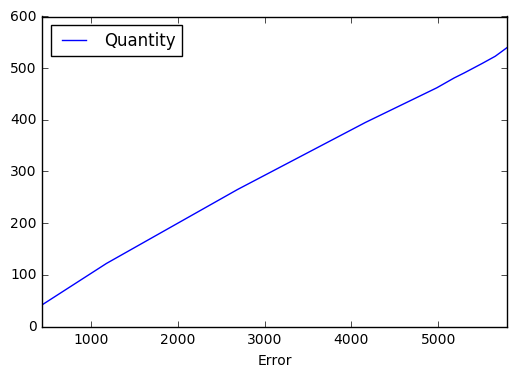

In [134]:
fig, ax = plt.subplots(nrows=1, ncols=1)
final_df.plot(x="Error", y="Quantity", ax=ax)

# Generic Thresholds

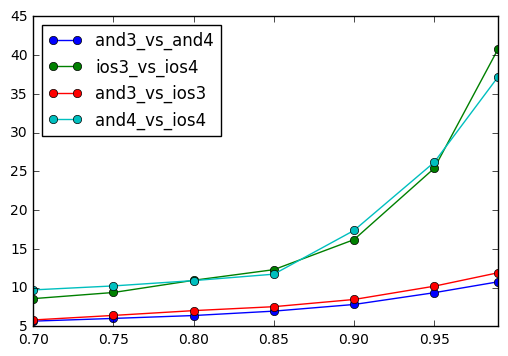

In [135]:
#Assume thresholds are percentiles in the range [0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99]
#for each of the four baselines, show quantity vs error, at those thresholds in one graph
# are they similar or different? compare to thresholds from previous grahs where ground distance aka error
#is taken into account. 

Thresholds = [0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99]
#distances1, distances2, distances3, distances4
fig, axes = plt.subplots(nrows=1, ncols=1)
q1 = distances1.baseline_distances1.quantile(Thresholds)
q2 = distances2.baseline_distances2.quantile(Thresholds)
q3 = distances3.baseline_distances3.quantile(Thresholds)
q4 = distances4.baseline_distances4.quantile(Thresholds)
q1.plot(ax = axes, style='o-')
q2.plot(ax = axes, style ='o-')
q3.plot(ax = axes, style ='o-')
q4.plot(ax = axes, style ='o-')
lines, labels = axes.get_legend_handles_labels()
axes.legend(lines, ["and3_vs_and4", "ios3_vs_ios4", "and3_vs_ios3", "and4_vs_ios4"], loc='best')

# Analysis of thresholds

In [143]:
q2

0.7000000000    8.5883955328
0.7500000000    9.3813405020
0.8000000000   10.9562770055
0.8500000000   12.3267420449
0.9000000000   16.2013706004
0.9500000000   25.4006080792
0.9900000000   40.8528957121
Name: baseline_distances2, dtype: float64

In [139]:
#q1 = 0.90  - 7.8
#q2 = 0.85 = 12
#q3 = 0.90 = 8.47
#q4 = 0.85 = 11.9

#Values from knee graphs
#q1 = 6 and 8  
#q2 = 10 - 15  
#q3 = 6 - 7  
#q4 = 10 - 15 ( 12.5) 


0.7000000000    9.7157484120
0.7500000000   10.2294035790
0.8000000000   10.9149148379
0.8500000000   11.7441567603
0.9000000000   17.3858121919
0.9500000000   26.1746046602
0.9900000000   37.2485915942
Name: baseline_distances4, dtype: float64

# Maps

In [55]:
gt_gj = [{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [[37.8705228,-122.2659393], [37.8696579, -122.2659628], 
        [37.8686967, -122.2663615],
        [37.8677596, -122.2659781], [37.8681473, -122.2636508],
        [37.8672381, -122.2634622], [37.8674299, -122.2612558], 
        [37.8666323, -122.261009], [37.8669238, -122.2587255]]
  }
}]


In [56]:
import emission.analysis.plotting.leaflet_osm.our_plotter as lo
import emission.analysis.plotting.geojson.geojson_feature_converter as gfc
import emission.analysis.plotting.leaflet_osm.ipython_helper as ipy

In [57]:
    ipy.inline_maps([lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(iphone_df_3)]) + 
                    lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(iphone_df_4)]) + 
                     lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(android_df_3)]) +
                     lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(android_df_4)])])

Found 774 features from 774 points
Found 733 features from 733 points
Found 830 features from 830 points
Found 831 features from 831 points


In [58]:
import geojson as gj

In [59]:
gfc.get_feature_list_from_df(iphone_df_3)["features"][1]

Found 774 features from 774 points


{"geometry": {"coordinates": [[-122.2661068384743, 37.87053928248386], [-122.2661030666179, 37.87052507515799], [-122.2661027313417, 37.87051086783211], [-122.2661068384743, 37.87049645095865], [-122.2661117837972, 37.87048291418503], [-122.2661133763588, 37.87046979650657], [-122.2661091854072, 37.87045479289989], [-122.2660995462185, 37.87043740045081], [-122.2660894879347, 37.87042168438236], [-122.266082279498, 37.87040902770858], [-122.2660752386993, 37.87040018480073], [-122.2660678626246, 37.87039016842644], [-122.2660579719788, 37.87037788893829], [-122.2660465725905, 37.87036397497903], [-122.2660318204409, 37.87035052202444], [-122.2660207563287, 37.87033690143178], [-122.2660123744255, 37.87032554395299], [-122.2660062556362, 37.87031276155065], [-122.2660010588563, 37.87029771603446], [-122.2659962811715, 37.87028518508922], [-122.2659978737331, 37.8702745819817], [-122.2659989633805, 37.87026343405049], [-122.2659996339327, 37.87025257948588], [-122.2660010588563, 37.87024

In [60]:
distances_pts = distances[["android3_lat","android3_lng", "android4_lat",
                           "android4_lng","ground_truth_lat","ground_truth_lng","ts",
                           "fmt_time", "ground_distances", "baseline_distances3"]].copy()

In [61]:
gd_25 = distances_pts[(distances_pts.ground_distances < 25) & (distances_pts.ground_distances > 20)]
new_gd_25 = pd.DataFrame({"ts": gd_25.ts, "latitude": gd_25.ground_truth_lat, "longitude":gd_25.ground_truth_lng,
                         "fmt_time":gd_25.fmt_time})
and3 = pd.DataFrame({"ts": gd_25.ts, "latitude": gd_25.android3_lat, "longitude":gd_25.android3_lng, 
                    "fmt_time":gd_25.fmt_time})
and4 = pd.DataFrame({"ts": gd_25.ts, "latitude": gd_25.android4_lat, "longitude":gd_25.android4_lng,
                    "fmt_time":gd_25.fmt_time})

In [62]:
ipy.inline_maps([lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(new_gd_25)]) + 
                    lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(and3)]) + 
                     lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(and4)])])

Found 32 features from 32 points
Found 32 features from 32 points
Found 32 features from 32 points


In [ ]:
# reason for not using mean ( these particular points lower mean error instead of increaing it)
# calculate mean with and without points  - actual ground distances. 

In [93]:
points_20_25 = gd_25
e_p = [points_20_25.baseline_distances3.describe()["count"],points_20_25["ground_distances"].mean(),points_20_25["ground_distances"].sum()]
e_p

[32.0, 21.646252196224147, 692.6800702791727]

In [65]:
# linear programming? - to calculate thresholds given only baseline input data. 
# objective function: want to chose a threshold that maximises the quantity and reduces the error
# f(baseline data) threshold
# threshold - value that maximises quantity and minimizes error - but we don't have that because 
# we calculate error based on ground-distance - we can calculate quantity for given thresholds
# but need to figure out how to evaluate the quality of the points within that threshold only given baseline data

# if i'm eye - balling  - all the ideal thresholds seem to be the ones that include all the points
# based on the fact that the error is the standard mean error. the lowest error occurs at the highest threshold
# so maybe thats not a good evaluation of quality? 

# quality  - 

def threshold_calc(data):
    min_dist = min (data)
    max_dist = max(data)
    threshold_range = np.arange(min_dist,max_dist,5)
    

ImportError: No module named cvxpy

SyntaxError: invalid syntax (<ipython-input-68-a48818ae8b89>, line 1)